# The Emission Gap: How Companies are Driving Net-Zero Initiatives by 2050 
### Final Project - BrainStation Data Science Certificate 
#### Alejandra Huaman

## Packages Install
We'll now install a few libraries.

In [1]:
# A data analysis tool to get more insights of your data, specifically categorical variables
!pip install dython

## Packages Import

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Standard libraries
import math
import re

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import squarify

# Other libraries|
from scipy import stats
from scipy.stats import chi2_contingency

# Identifying categorical variables
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

# To read the entire Pandas DataFrame I used the 'set_option()' function
#pd.set_option("display.max_rows", None)

## Objective
In this Jupyter Notepad, we will using the Companies Taking Action dataset to visualize how companies are driving net-zero initiatives to increasing climate resilience in the private sector. By drawing people’s attention to this green energy transition, we would think about what’s the impact of managing our land and resources more efficiently.

The dataset can be found here:https://sciencebasedtargets.org/companies-taking-action

## Hyphothesis
- What industries  are driving the green energy transition?
- What is the most common commitment? 
- What is the tendency of different sectors?


## Data Loading and Handling
Let's download the data and save it to a folder in our local directory called 'data'. After downloading the data, we read it.

In [3]:
# Read the data
data = pd.read_csv('data/companies-taking-action.csv')

## Data Exploration
There are two feature types in the dataset:

- Numerical: any feature that contains numeric values
- Categorical: any feature that contains categories, or text

In [4]:
# Describing all the Features
data.describe(include='all')

,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,Net-Zero Year,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
count,2466,1006,2466,1156,1145,7,7,8,2466,7,2466,2466,1059,2466,2466,2466,2465,1155,1151,192
unique,2461,997,3,4,65,1,1,4,2,4,3,2,31,74,6,56,74,1155,7,4
top,Softcat plc,SE0012454841,Committed,1.5°C,2030,Targets Set,1.5°C,2040,No,2040,Company,No,01/09/2021,United Kingdom (UK),Europe,Professional Services,01/10/2021,A1 Telekom Austria Group commits to reduce abs...,The targets covering greenhouse gas emissions ...,Financial Institution. Deadline to submit targ...
freq,2,2,1311,798,745,7,7,4,1643,3,2079,1408,144,436,1373,218,222,1,749,98


In [5]:
# Let's have a quick look at our data
data.head()

,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,Net-Zero Year,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,A1 Telekom Austria Group,AT0000720008,Targets Set,1.5°C,2030,NaN,NaN,NaN,No,NaN,Company,No,NaN,Austria,Europe,Telecommunication Services,01/09/2020,A1 Telekom Austria Group commits to reduce abs...,The targets covering greenhouse gas emissions ...,NaN
1,A2A S.p.A.,IT0001233417,Targets Set,2°C,"2030, 2024, 2030",NaN,NaN,NaN,No,NaN,Company,No,NaN,Italy,Europe,Electric Utilities and Independent Power Produ...,01/03/2020,Italian multi-utility company A2A S.p.A commit...,The targets covering greenhouse gas emissions ...,NaN
2,Aardvark Certification Ltd,NaN,Targets Set,Well-below 2°C,2030,NaN,NaN,NaN,No,NaN,Small or Medium Enterprise,No,NaN,United Kingdom (UK),Europe,Professional Services,01/07/2020,Aardvark Certification Ltd. commits to reduce ...,The targets covering greenhouse gas emissions ...,NaN
3,AB InBev,BE0974293251,Targets Set,1.5°C,2025,NaN,NaN,NaN,No,NaN,Company,No,NaN,Belgium,Europe,Food and Beverage Processing,01/03/2018,Global Brewer AB InBev commits to reduce absol...,The targets covering greenhouse gas emissions ...,NaN
4,ABB,CH0012221716,Targets Set,1.5°C,2030,NaN,NaN,NaN,Yes,NaN,Company,Yes,01/05/2021,Switzerland,Europe,Electrical Equipment and Machinery,01/06/2021,ABB commits to reduce absolute scope 1 and 2 G...,The targets covering greenhouse gas emissions ...,NaN


In [6]:
# But if you take a further look, I realize there is no numerical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Company Name                       2466 non-null   object
 1   ISIN                               1006 non-null   object
 2   Near term - Target Status          2466 non-null   object
 3   Near term - Target Classification  1156 non-null   object
 4   Near term - Target Year            1145 non-null   object
 5   Long term - Target Status          7 non-null      object
 6   Long term - Target Classification  7 non-null      object
 7   Long term - Target Year            8 non-null      object
 8   Net-Zero Committed                 2466 non-null   object
 9   Net-Zero Year                      7 non-null      object
 10  Organization Type                  2466 non-null   object
 11  BA1.5?                             2466 non-null   object
 12  BA1.5 

In [7]:
# The data shows the majority of the companies included in this data source are EU
data[["Region"]].value_counts()

Region       
Europe           1373
Asia              496
North America     424
Latin America      83
Oceania            67
Africa             23
dtype: int64

Here we can see the majority of companies driving net-zero initiatives are located in Europe. However, if we take a look at those countries. We noticed the leading countries are United Kingdom, United States of America, Japan, France, and Sweden in the top 5. We also see here that Europe is very committed towards a low-carbon future compared to Asia or North America according to the *Science Based Targets* dataset.

In [8]:
# Top countries driving the green transition
# Here I learned there are duplicated values
data[["Country"]].value_counts().head(15)

Country                       
United Kingdom (UK)               436
United States of America (USA)    375
Japan                             187
France                            134
Sweden                            132
Germany                           117
Netherlands                        69
India                              67
Denmark                            64
Switzerland                        63
Spain                              58
China                              56
Belgium                            51
Australia                          50
Canada                             46
dtype: int64

In [9]:
# Let's take a look at the number of companies by country
data[["Country"]].value_counts()

Country                       
United Kingdom (UK)               436
United States of America (USA)    375
Japan                             187
France                            134
Sweden                            132
                                 ... 
Israel                              1
Estonia                             1
Costa Rica                          1
Bolivia                             1
Lebanon                             1
Length: 74, dtype: int64

In [10]:
# Identify the most committed sector
sector = data[["Sector"]].value_counts()
sector.head(15)

Sector                                                                                                                  
Professional Services                                                                                                       218
Food and Beverage Processing                                                                                                174
Textiles, Apparel, Footwear and Luxury Goods                                                                                155
Banks, Diverse Financials, Insurance                                                                                        129
Software and Services                                                                                                       125
Real Estate                                                                                                                 122
Electrical Equipment and Machinery                                                                             

Here we can see private companies are the leaders transitiong to a green economy.

In [11]:
data[["Organization Type"]].value_counts()

Organization Type         
Company                       2079
Small or Medium Enterprise     260
Financial Institution          127
dtype: int64

The data below corresponds to my initial findings. Stay tuned!

In [12]:
data.head()

,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,Net-Zero Year,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,A1 Telekom Austria Group,AT0000720008,Targets Set,1.5°C,2030,NaN,NaN,NaN,No,NaN,Company,No,NaN,Austria,Europe,Telecommunication Services,01/09/2020,A1 Telekom Austria Group commits to reduce abs...,The targets covering greenhouse gas emissions ...,NaN
1,A2A S.p.A.,IT0001233417,Targets Set,2°C,"2030, 2024, 2030",NaN,NaN,NaN,No,NaN,Company,No,NaN,Italy,Europe,Electric Utilities and Independent Power Produ...,01/03/2020,Italian multi-utility company A2A S.p.A commit...,The targets covering greenhouse gas emissions ...,NaN
2,Aardvark Certification Ltd,NaN,Targets Set,Well-below 2°C,2030,NaN,NaN,NaN,No,NaN,Small or Medium Enterprise,No,NaN,United Kingdom (UK),Europe,Professional Services,01/07/2020,Aardvark Certification Ltd. commits to reduce ...,The targets covering greenhouse gas emissions ...,NaN
3,AB InBev,BE0974293251,Targets Set,1.5°C,2025,NaN,NaN,NaN,No,NaN,Company,No,NaN,Belgium,Europe,Food and Beverage Processing,01/03/2018,Global Brewer AB InBev commits to reduce absol...,The targets covering greenhouse gas emissions ...,NaN
4,ABB,CH0012221716,Targets Set,1.5°C,2030,NaN,NaN,NaN,Yes,NaN,Company,Yes,01/05/2021,Switzerland,Europe,Electrical Equipment and Machinery,01/06/2021,ABB commits to reduce absolute scope 1 and 2 G...,The targets covering greenhouse gas emissions ...,NaN


## Data Cleaning
**Cleaning:** To clean our data, we'll need to work with:
- **Missing values:** Either omit elements from a dataset that contain missing values or impute them (fill them in).
- **Duplicated values:** Delete duplicated values.
- **Outliers:** They should be detected, but not necessarily removed. 
- **Renaming:** Used to keep the data consistent.

In [13]:
# Let's take a look at existing features
data.columns

Index(['Company Name', 'ISIN', 'Near term - Target Status',
       'Near term - Target Classification', 'Near term - Target Year',
       'Long term - Target Status', 'Long term - Target Classification',
       'Long term - Target Year', 'Net-Zero Committed', 'Net-Zero Year',
       'Organization Type', 'BA1.5?', 'BA1.5 Date', 'Country', 'Region',
       'Sector', 'Date', 'Target', 'Target Classification', 'Extension'],
      dtype='object')

To perform the data analysis, I wil create a new dataframe with the following columns:
- Company Name
- Near term - Target Status
- Near term - Target Classification
- Near term - Target Year
- Net-Zero Committed
- Organization Type
- BA1.5? (Business Ambition for 1.5°C)
- BA1.5 Date
- Country
- Region 
- Sector
- Date
- Target
- Target Classification

In [14]:
# Some of the features are not necessary to the analysis, so I select the columns below
df = data[["Company Name","Near term - Target Status","Near term - Target Classification","Near term - Target Year",
           "Net-Zero Committed","Organization Type","BA1.5?","BA1.5 Date","Country","Region","Sector","Date","Target",
           "Target Classification"]]

df.columns

Index(['Company Name', 'Near term - Target Status',
       'Near term - Target Classification', 'Near term - Target Year',
       'Net-Zero Committed', 'Organization Type', 'BA1.5?', 'BA1.5 Date',
       'Country', 'Region', 'Sector', 'Date', 'Target',
       'Target Classification'],
      dtype='object')

### Renaming the columns in place
Let's rename the columns to manipulate easily the data:

In [15]:
df.rename(columns=({'Company Name':'Company','Near term - Target Status':'Status'
                     ,'Near term - Target Classification':'Climate_Target'
                     ,'Near term - Target Year':'Target_Year','Net-Zero Committed':'Net-Zero_Committed'
                      ,'Organization Type':'Type','BA1.5?':'1.5C'
                     ,'BA1.5 Date':'1.5C_Date','Target Classification':'Target_Classification'}),inplace=True)

In [16]:
# Check if renaming worked and only selected columns are part of the dataset
for col in df:
    print(col)

Company
Status
Climate_Target
Target_Year
Net-Zero_Committed
Type
1.5C
1.5C_Date
Country
Region
Sector
Date
Target
Target_Classification


In [17]:
# Let's have a quick look at our data
df.head(2)

,Company,Status,Climate_Target,Target_Year,Net-Zero_Committed,Type,1.5C,1.5C_Date,Country,Region,Sector,Date,Target,Target_Classification
0,A1 Telekom Austria Group,Targets Set,1.5°C,2030,No,Company,No,NaN,Austria,Europe,Telecommunication Services,01/09/2020,A1 Telekom Austria Group commits to reduce abs...,The targets covering greenhouse gas emissions ...
1,A2A S.p.A.,Targets Set,2°C,"2030, 2024, 2030",No,Company,No,NaN,Italy,Europe,Electric Utilities and Independent Power Produ...,01/03/2020,Italian multi-utility company A2A S.p.A commit...,The targets covering greenhouse gas emissions ...


### Duplicated values
While exploring the dataset, I noticed some values are duplicated:

In [18]:
# Count status
df[["Status"]].value_counts()

Status     
Committed      1311
Targets Set    1146
Targets set       9
dtype: int64

In [19]:
# Rename value "Targets Set" from feature "Status" to remove duplicates
df["Status"].replace({"Targets set": "Targets Set"}, inplace=True)
df[["Status"]].value_counts()

Status     
Committed      1311
Targets Set    1155
dtype: int64

In [20]:
# rename value from "United Kingdom" to "United Kingdom"
df["Country"].replace({"United Kingdom": "United Kingdom (UK)"}, inplace=True)
df[["Country"]].value_counts()

Country                       
United Kingdom (UK)               437
United States of America (USA)    375
Japan                             187
France                            134
Sweden                            132
                                 ... 
Israel                              1
Estonia                             1
Costa Rica                          1
Bolivia                             1
Kuwait                              1
Length: 73, dtype: int64

### Missing values

In [21]:
# Fill no value from global limit ambition with "No Mark"
df["Target_Classification"].fillna("No Mark", inplace = True)

In [22]:
# Fill no value from Business Ambition for 1.5C with "No Date"
df["1.5C_Date"].fillna("No Date", inplace = True)

In [23]:
df["Target"].fillna("No Target", inplace = True)

### Outliers

In [24]:
# Here we can see the outliers
df["Sector"].value_counts().tail(10)

Specialized Consumer Services                         5
Water Transportation - Ports and Services             4
Gas Utilities                                         3
Textile Manufacturing, Spinning, Weaving & Apparel    3
Education Services                                    2
Electric Utilities and IPPs and Energy Traders        1
Telecommunication services                            1
Building products                                     1
Pharmaceuticals, Biotechnology and Life Sciences      1
Public Agencies                                       1
Name: Sector, dtype: int64

Here, we can see some of the outliers correspond to the following sectors:
- Education Services
- Public Agencies
- Pharmaceuticals, Biotechnology and Life Sciences
- Electric Utilities and IPPs and Energy Traders
- Telecommunication services  

It would be great to use a box plot to visualize the outliers, but since there is no nummerical data. This is not possible.

In [25]:
# Let's take a look at the cleaned dataframe
df.head()

,Company,Status,Climate_Target,Target_Year,Net-Zero_Committed,Type,1.5C,1.5C_Date,Country,Region,Sector,Date,Target,Target_Classification
0,A1 Telekom Austria Group,Targets Set,1.5°C,2030,No,Company,No,No Date,Austria,Europe,Telecommunication Services,01/09/2020,A1 Telekom Austria Group commits to reduce abs...,The targets covering greenhouse gas emissions ...
1,A2A S.p.A.,Targets Set,2°C,"2030, 2024, 2030",No,Company,No,No Date,Italy,Europe,Electric Utilities and Independent Power Produ...,01/03/2020,Italian multi-utility company A2A S.p.A commit...,The targets covering greenhouse gas emissions ...
2,Aardvark Certification Ltd,Targets Set,Well-below 2°C,2030,No,Small or Medium Enterprise,No,No Date,United Kingdom (UK),Europe,Professional Services,01/07/2020,Aardvark Certification Ltd. commits to reduce ...,The targets covering greenhouse gas emissions ...
3,AB InBev,Targets Set,1.5°C,2025,No,Company,No,No Date,Belgium,Europe,Food and Beverage Processing,01/03/2018,Global Brewer AB InBev commits to reduce absol...,The targets covering greenhouse gas emissions ...
4,ABB,Targets Set,1.5°C,2030,Yes,Company,Yes,01/05/2021,Switzerland,Europe,Electrical Equipment and Machinery,01/06/2021,ABB commits to reduce absolute scope 1 and 2 G...,The targets covering greenhouse gas emissions ...


## Data Analysis

In [26]:
df_viz = df[['Status', 'Climate_Target', 'Net-Zero_Committed', 'Type', '1.5C', '1.5C_Date', 'Country', 'Region']]

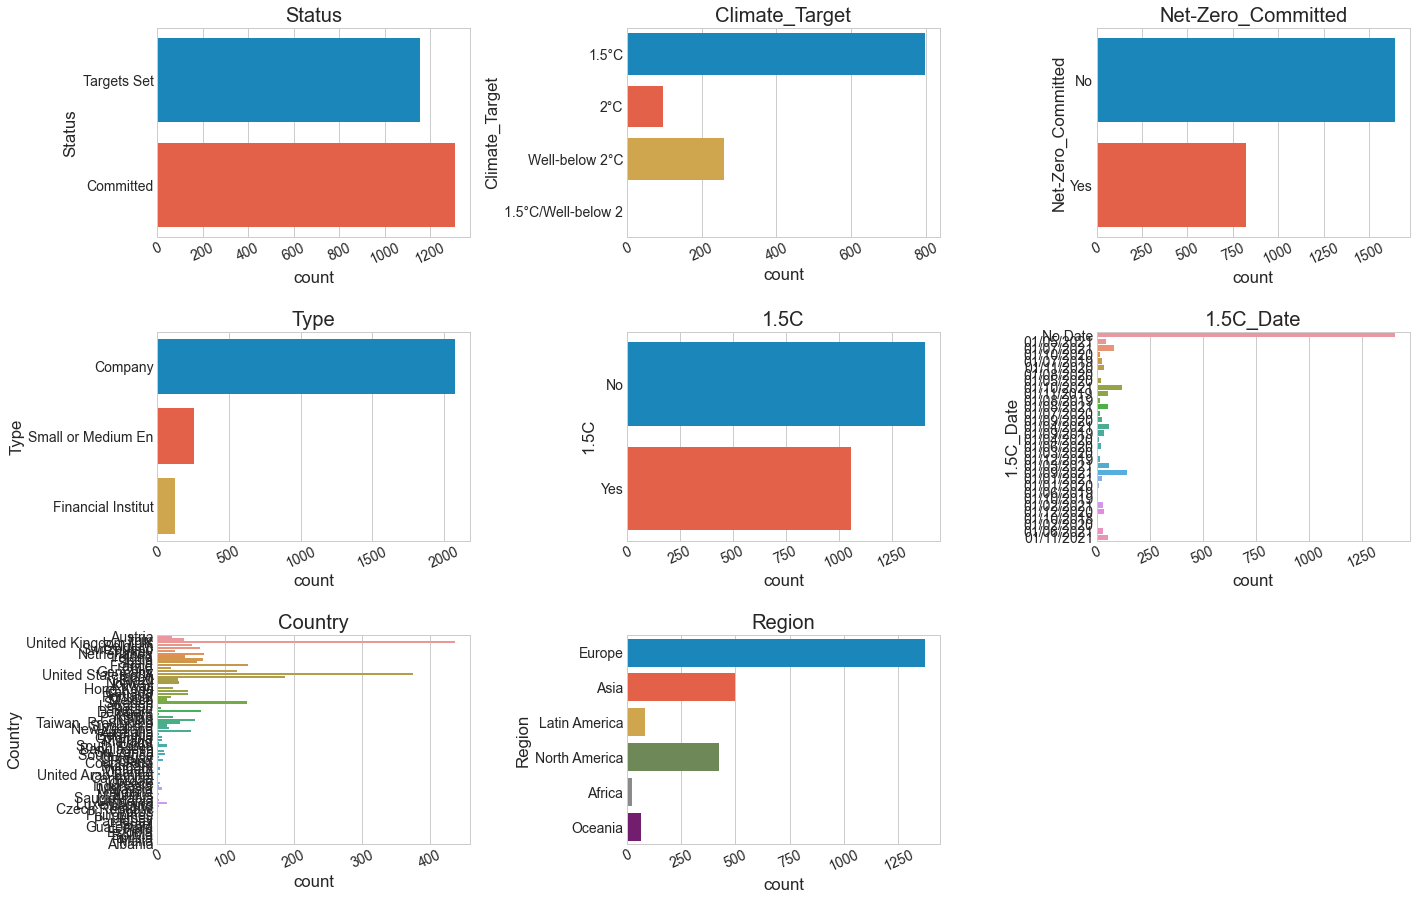

In [29]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df_viz, cols=3, width=20, height=14, hspace=0.45, wspace=0.5)

### Analyzing relationships between variables

In [30]:
# We can use the function identify_nominal_columns(dataset) of the dython library 
#to identify the categorical variables 
identify_nominal_columns(df)

['Company',
 'Status',
 'Climate_Target',
 'Target_Year',
 'Net-Zero_Committed',
 'Type',
 '1.5C',
 '1.5C_Date',
 'Country',
 'Region',
 'Sector',
 'Date',
 'Target',
 'Target_Classification']

Let’s find the correlation of categorical variables:

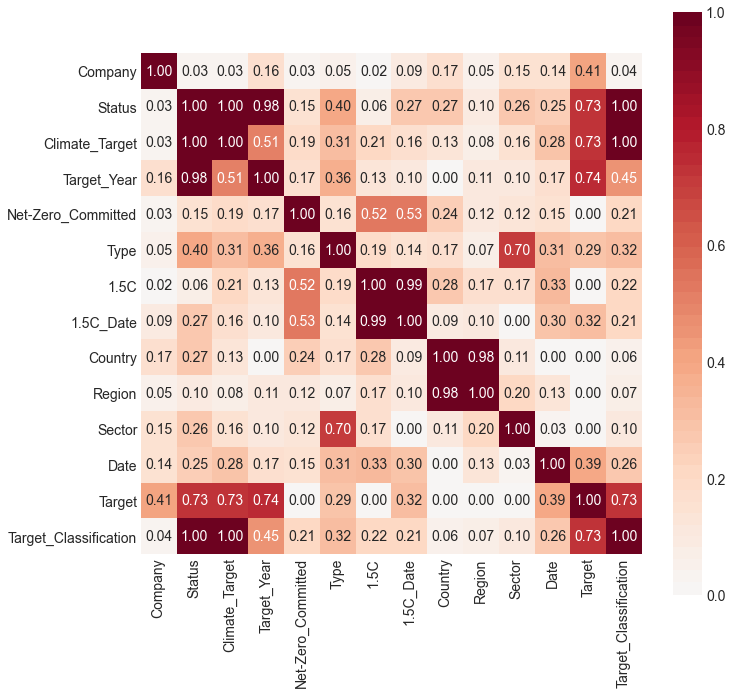

In [31]:
# Using associations function from dython package to identify the correlation of categorical values
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10), 
                                   cmap=sns.color_palette("RdBu_r", 100))

### Feature: Region

In [32]:
# Let's take a look on how the data is structured by region
data_by_region = df.groupby(by='Region').count()
data_by_region

,Company,Status,Climate_Target,Target_Year,Net-Zero_Committed,Type,1.5C,1.5C_Date,Country,Sector,Date,Target,Target_Classification
Region,,,,,,,,,,,,,
Africa,23,23,7,7,23,23,23,23,23,23,23,23,23
Asia,496,496,249,247,496,496,496,496,496,496,496,496,496
Europe,1373,1373,627,622,1373,1373,1373,1373,1373,1373,1373,1373,1373
Latin America,83,83,20,20,83,83,83,83,83,83,83,83,83
North America,424,424,217,216,424,424,424,424,424,424,423,424,424
Oceania,67,67,36,33,67,67,67,67,67,67,67,67,67


In [33]:
# Number of companies by region
df_continents = df.Region.value_counts()
print(df_continents)

Europe           1373
Asia              496
North America     424
Latin America      83
Oceania            67
Africa             23
Name: Region, dtype: int64


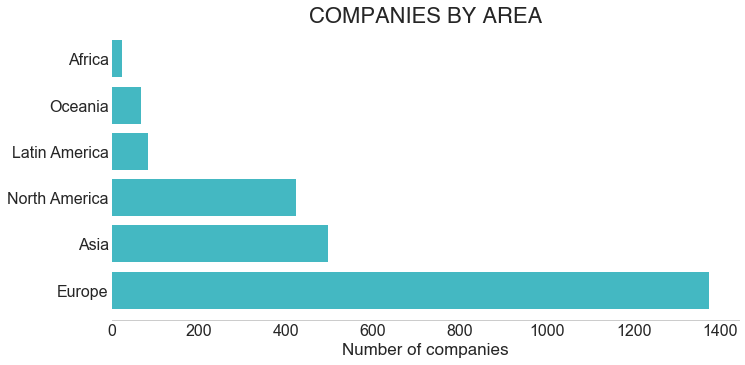

In [34]:
df.Region.value_counts().plot(kind="barh",figsize=(10,5),color='#44b8c2',width=0.8)
csfont = {'fontname':'Helvetica'}
hfont = {'fontname':'Helvetica'}
plt.title('COMPANIES BY AREA', fontsize=22, **csfont)
plt.xlabel('Number of companies', fontsize=17, **hfont)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.grid(False)
plt.show()

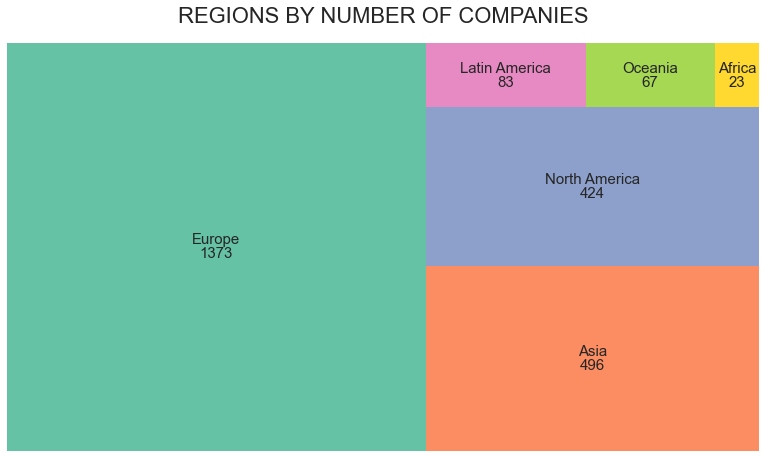

In [35]:
plt.figure(figsize=(12,7))
squarify.plot(sizes=df_continents, label=df_continents.index, value=df_continents,
              color=[matplotlib.cm.Set2(i) for i in range(7)],
              text_kwargs={'fontsize': 15})
plt.title('REGIONS BY NUMBER OF COMPANIES', fontsize=22, pad=20)
plt.axis('off')
plt.show()

In [36]:
# Here I would like to the analyze the status
df_status = df[["Status","Climate_Target","Target_Year","Country","Region","Sector"]]

df_status.columns

Index(['Status', 'Climate_Target', 'Target_Year', 'Country', 'Region',
       'Sector'],
      dtype='object')

In [37]:
contigency_region = pd.crosstab(index=df_status['Region'], columns=df_status['Status'])
contigency_region.head(20)

Status,Committed,Targets Set
Region,,
Africa,16,7
Asia,247,249
Europe,747,626
Latin America,63,20
North America,207,217
Oceania,31,36


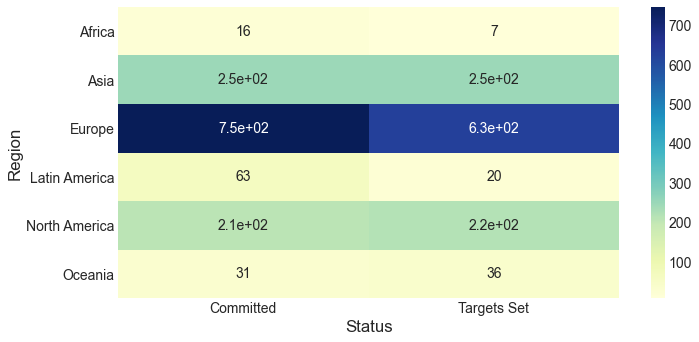

In [38]:
# We can use a heatmap to visualize the contingency table
plt.figure(figsize=(10,5))
sns.heatmap(contigency_region, annot=True, cmap="YlGnBu");

### Feature: Organization Type

In [39]:
# Preparing data for Pie
df_type = df.Type.value_counts()
print(df_type)

Company                       2079
Small or Medium Enterprise     260
Financial Institution          127
Name: Type, dtype: int64


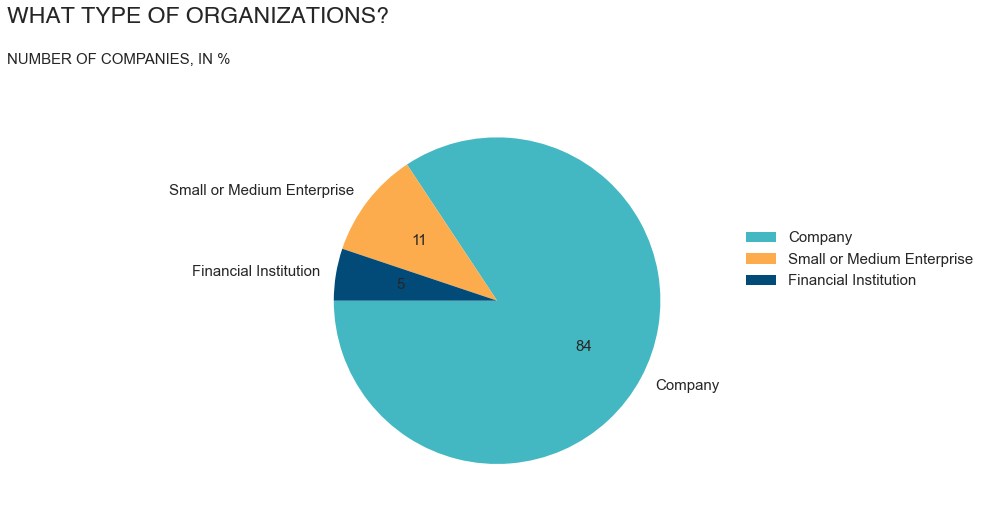

In [40]:
# Pie chart for organization type
df_type.plot(kind='pie', figsize=(7,7), autopct='%1.0f', startangle=180, textprops={'fontsize': 15},
             colors = ['#44b8c2', '#fcac4c', '#024b79'],ylabel=''),;
plt.text(x=-3, y=1.7, s='WHAT TYPE OF ORGANIZATIONS?', name= 'helvetica',weight='bold',fontsize=23);
plt.text(x=-3, y=1.45, s='NUMBER OF COMPANIES, IN %', fontsize=15);

leg = plt.legend(loc="right", bbox_to_anchor=(1.25, 0.1, 0.45, 1), fontsize=15)

### Feature: Sector
Here I would like to analyze the 85% of total companies to focus on sectors with the most impact. 

In [41]:
# Number of total companies
n_companies = df['Sector'].count()
n_companies

2466

In [42]:
# Number of sectors
n_sector = df['Sector'].nunique()
n_sector

56

In [43]:
# 85 percentage of total companies
percent_85 = (n_companies * 85) / 100
percent_85 - n_companies

-369.9000000000001

In [44]:
# I can see the last 31 sectors represents about 15% of total
df['Sector'].value_counts().tail(31).sum()

343

In [45]:
# 56 - 31 = 25
df['Sector'].value_counts().head(25)

Professional Services                                                                                                       218
Food and Beverage Processing                                                                                                174
Textiles, Apparel, Footwear and Luxury Goods                                                                                155
Banks, Diverse Financials, Insurance                                                                                        129
Software and Services                                                                                                       125
Electrical Equipment and Machinery                                                                                          122
Real Estate                                                                                                                 122
Construction and Engineering                                                                            

The top 15 sectors:
1. Professional Services                                                                                               
2. Food and Beverage Processing                                                                                       
3. Textiles, Apparel, Footwear and Luxury Goods                                                                       
4. Banks, Diverse Financials, Insurance                                    5. Software and Services                                                                                               
6. Electrical Equipment and Machinery                                                                                 
7. Real Estate                                                                                                         
8. Construction and Engineering                                                                                       
9. Consumer Durables, Household and Personal Products                                                                 
10. Retailing                                                                                                         
11. Electric Utilities and Independent Power Producers and Energy Traders (including fossil, alternative and nuclear energy)    
12. Technology Hardware and Equipment                                                                                 
13. Telecommunication Services                                                                                         
14. Chemicals                                                                                                         
15. Automobiles and Components                                                                                         
16. Hotels, Restaurants and Leisure, and Tourism Services    

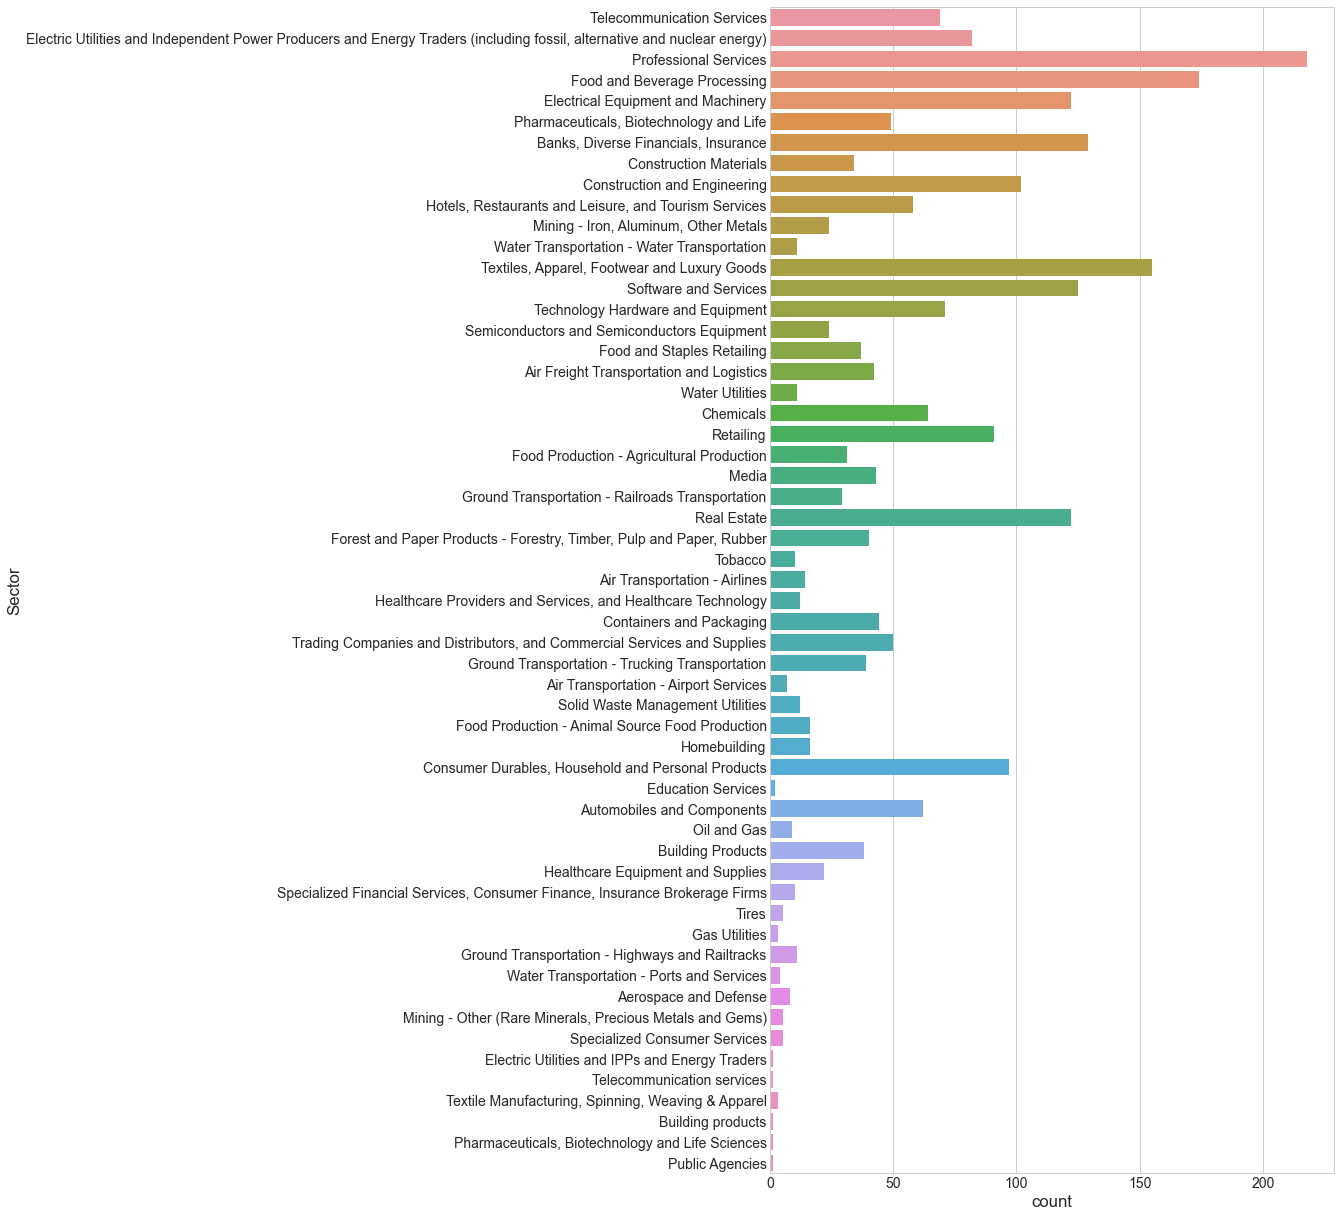

In [46]:
# Here we can see an overview of most committed sectors
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,20)) 
sns.countplot(y="Sector", data=df);

However, I would like to see what major sectors are driving these carbon dioxide reduction initiatives. 
To do that, I have reagroupped the number sectos from 56 to 10. 


In [47]:
# initialize list of lists
dat = [['Manufacture and Production', 660], ['Industry', 322], ['Finance and Banking', 317], ['Technology', 237], 
       ['Professional Services', 218], ['Energy and Mining', 218], ['Transport', 81], ['Agriculture', 62], 
       ['Travel and Leisure', 58], ['Life Sciences', 50], ['Education', 2]]
 
# Create the pandas DataFrame
df_sector = pd.DataFrame(dat, columns = ['Sector', ''])
 
# set column 'Sector' as index
df_sector.set_index('Sector', inplace=True)

# print dataframe
df_sector

,
Sector,
Manufacture and Production,660
Industry,322
Finance and Banking,317
Technology,237
Professional Services,218
Energy and Mining,218
Transport,81
Agriculture,62
Travel and Leisure,58


In [48]:
# Sectors leading the green transition
df_sector.head()

,
Sector,
Manufacture and Production,660
Industry,322
Finance and Banking,317
Technology,237
Professional Services,218


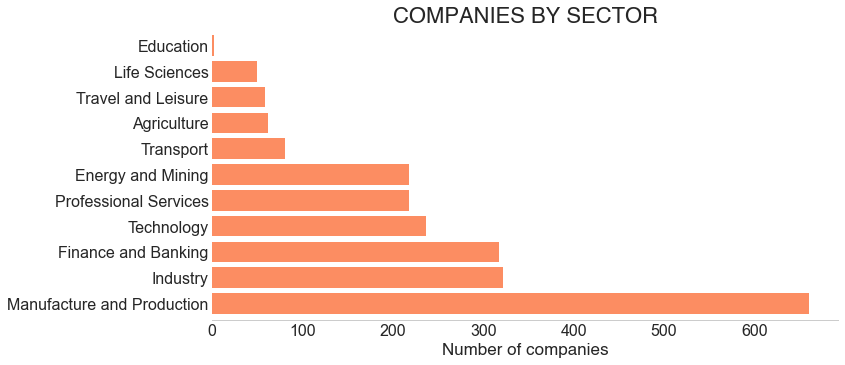

In [49]:
# Stacked bar for sector
#df_sector.plot(kind="barh",figsize=(10,5),color='#44b8c2',width=0.8,xlabel='')

colours = {"Manufacture and Production": "#273c75", "Industry": "#44bd32", "Finance and Banking": "#44b8c2", 
           "Technology": "#44b8c3", "Professional Services": "#44bd45", "Energy and Mining": "#273c75",
          "Transport": "#44b8c5", "Agriculture": "#44bd43", "Travel and Leisure": "#43b8c2", "Life Sciences": "#273c45",
          "Education": "#44bd41"}

df_sector.plot(kind="barh",stacked=False,figsize=(10,5),color='#fc8d62',width=0.8, xlabel='',legend=None)


csfont = {'fontname':'Helvetica'}
hfont = {'fontname':'Helvetica'}
plt.title('COMPANIES BY SECTOR', fontsize=22, **csfont)
plt.xlabel('Number of companies', fontsize=17, **hfont)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.grid(False)
plt.show()

In [50]:
# Here I could run a contigency table using the sector to see what sectors are most committed, 
#and which ones have already established targets in the near term to meet their goals
contigency_sector = pd.crosstab(index=df_status['Sector'], columns=df_status['Status'])
contigency_sector.head(20)

Status,Committed,Targets Set
Sector,,
Aerospace and Defense,7,1
Air Freight Transportation and Logistics,22,20
Air Transportation - Airlines,14,0
Air Transportation - Airport Services,4,3
Automobiles and Components,30,32
"Banks, Diverse Financials, Insurance",119,10
Building Products,15,23
Building products,1,0
Chemicals,43,21


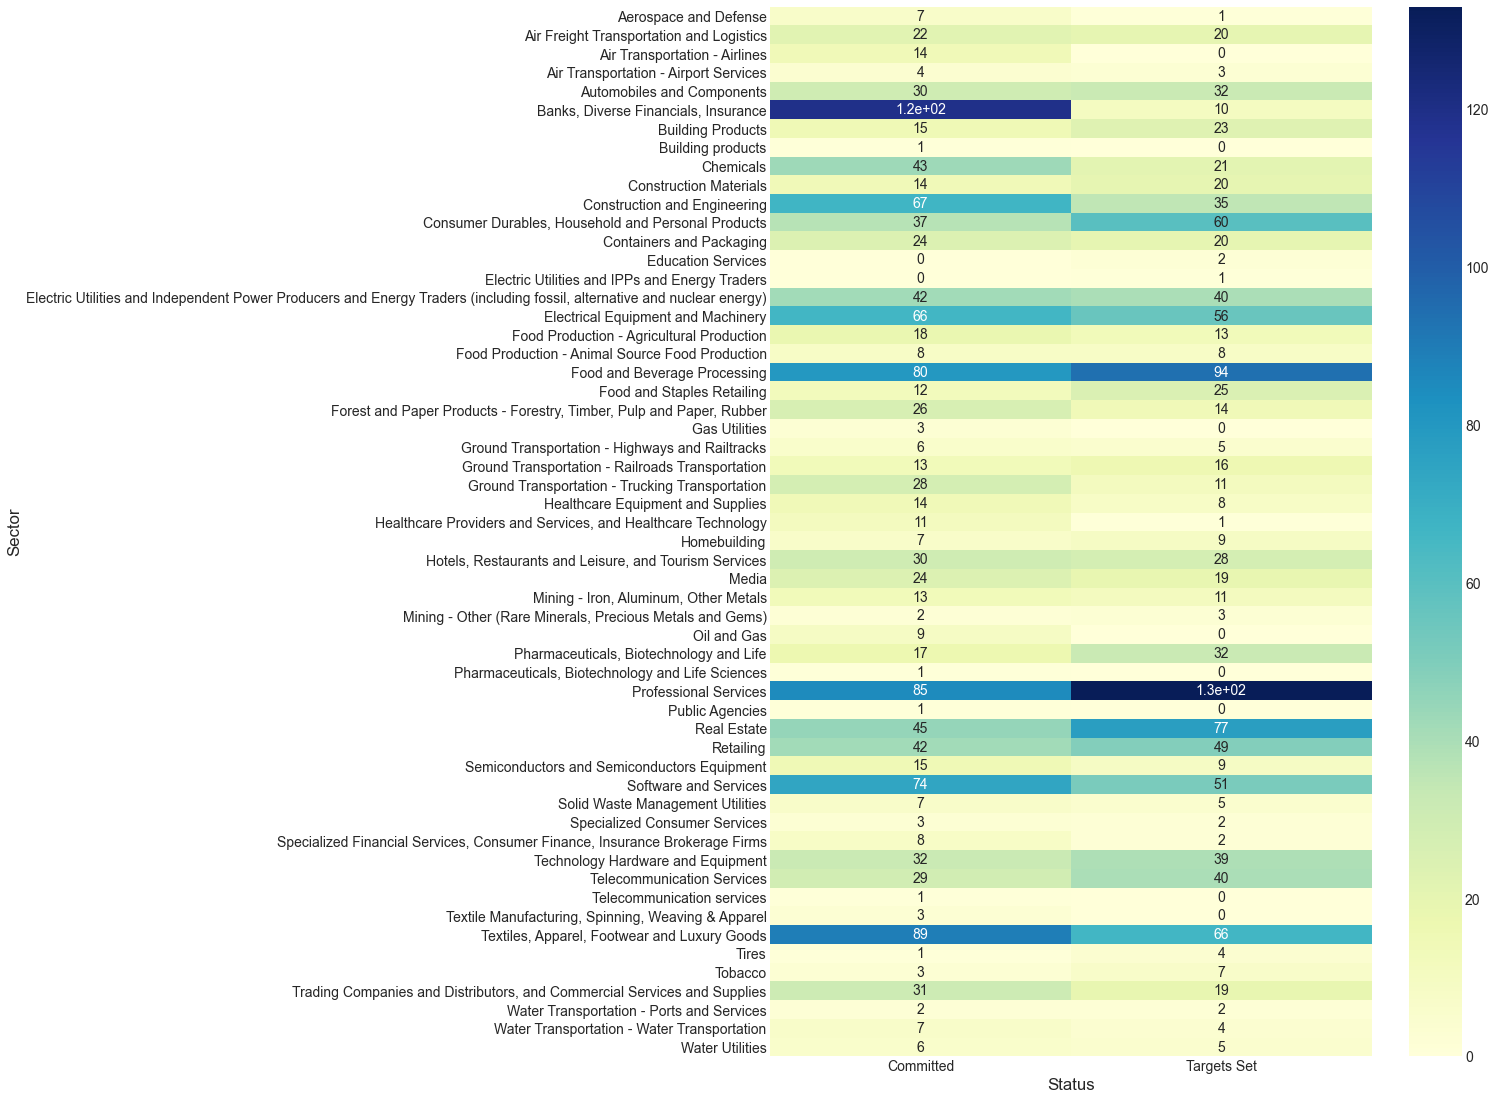

In [51]:
# We can use a heatmap to visualize the contingency table
plt.figure(figsize=(12,18)) 
sns.heatmap(contigency_sector, annot=True, cmap="YlGnBu");

### Feature: Net-Zero committed

In [52]:
# Preparing data for stacked bar
df_nz = df['Net-Zero_Committed'].value_counts()
print(df_nz)

No     1643
Yes     823
Name: Net-Zero_Committed, dtype: int64


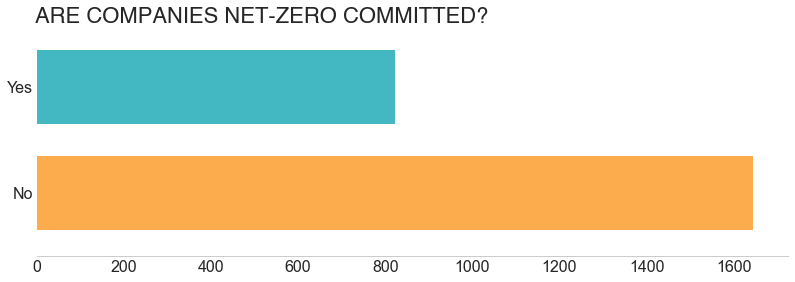

In [53]:
df_nz.plot(kind="barh",figsize=(12,4),color = ['#fcac4c','#44b8c2'], width=0.7, grid=False)
plt.text(x=-3, y=1.6, s='ARE COMPANIES NET-ZERO COMMITTED?', fontsize=22, **csfont)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine(left=True, bottom=False)
plt.show()

Where are these net-zero committed companies?

In [54]:
# By using the groupby function and including the region we can see where are the net-zero committed companies located
df2 = df.groupby(['Net-Zero_Committed']).agg({'Region':'value_counts'})
df2.sort_values(by='Net-Zero_Committed', ascending=False)

Region
Net-Zero_Committed Region               
Yes                Europe            511
                   North America     127
                   Asia              117
                   Latin America      37
                   Oceania            25
                   Africa              6
No                 Europe            862
                   Asia              379
                   North America     297
                   Latin America      46
                   Oceania            42
                   Africa             17

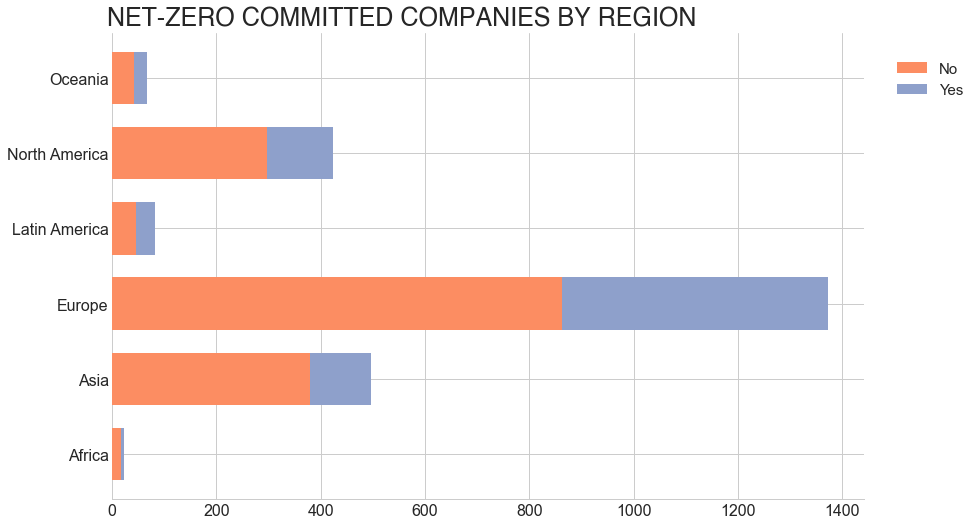

In [55]:
#plt.figure(figsize=(15,7))
df[['Net-Zero_Committed', 'Region']].value_counts().unstack(0).plot(kind='barh', stacked=True, 
 color = ['#fc8d62','#8ea0cb'], width=0.7, figsize=(12, 8), grid=True, xlabel='')
leg = plt.legend(loc="center right",bbox_to_anchor=(0.7, 0.4, 0.45, 1),fontsize=15)
#colors = ["#006D2C", "#31A354"]
plt.text(x=-10, y=5.7, s='NET-ZERO COMMITTED COMPANIES BY REGION', name= 'helvetica',weight='bold',fontsize=25);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine(left=True)
plt.show()

### Feature: Climate Target

In [56]:
df_ctarget = df.Climate_Target.value_counts()
print(df_ctarget)

1.5°C                   798
Well-below 2°C          260
2°C                      97
1.5°C/Well-below 2°C      1
Name: Climate_Target, dtype: int64


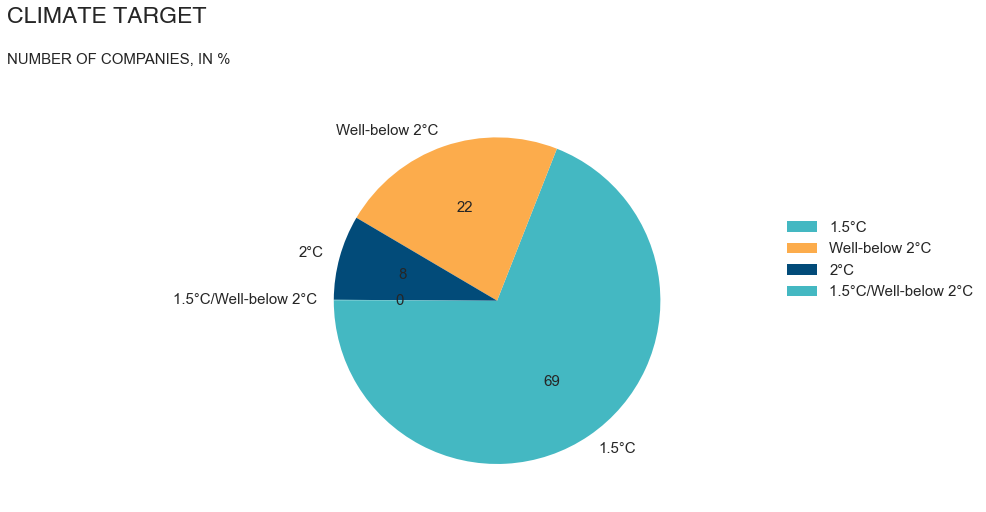

In [57]:
# Pie chart for organization type
df_ctarget.plot(kind='pie', figsize=(7,7), autopct='%1.0f', startangle=180, textprops={'fontsize': 15},
                colors = ['#44b8c2', '#fcac4c', '#024b79'], ylabel=''),;
plt.text(x=-3, y=1.7, s='CLIMATE TARGET', name= 'helvetica', weight='bold', fontsize=23);
plt.text(x=-3, y=1.45, s='NUMBER OF COMPANIES, IN %', fontsize=15);

leg = plt.legend(loc="right",bbox_to_anchor=(1.25, 0.1, 0.45, 1),fontsize=15)